<a href="https://colab.research.google.com/github/Arvinth-s/Pattern-Recognition/blob/main/Perceptron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
#OM NAMO NARAYANA

In [222]:
import random
import numpy as np
import matplotlib.pyplot as plt

**Rotation matrix**<br>
We generate a rotation matrix that rotates the axis to theta ( +30 degrees)


In [223]:
theta = np.radians(30)
cos_term, sin_term = np.cos(theta), np.sin(theta)
R = np.array(((cos_term, -sin_term), (sin_term, cos_term)))
print(R)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


N : number of datapoints in each classes<br>
M : dimension of each datapoint (here we take as 2 so they can be represented in a plane)

In [278]:
N = 50
M = 2

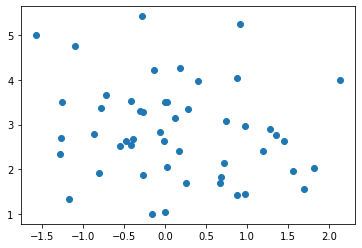

In [434]:
a = np.random.randn(N, M)
x = np.transpose(a)[0]
y = np.transpose(a)[1]
y = y - np.min(y) + 1
plt.scatter(x, y)
a = [x, y]

We generate random datapoints for class 1 and make the value of y greater than 0 for all datapoints

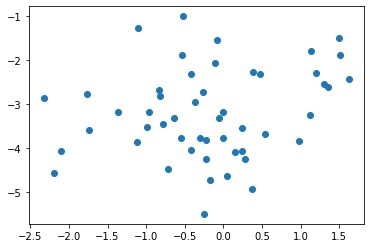

In [435]:
b = np.random.randn(N, M)
x = np.transpose(b)[0]
y = np.transpose(b)[1]
y = y - np.max(y) - 1
plt.scatter(x, y)
b = [x, y]

We generate random datapoints for class 1 and make the value of y greater than 0 for all datapoints

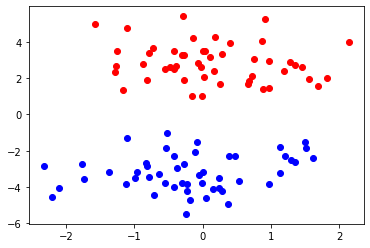

In [436]:
plt.scatter(a[0], a[1],c='r')
plt.scatter(b[0], b[1],c='b')
plt.show()

Datapoints belonging to class A is plotted in red and class B is plotted in blue. As seen from the figure, all the datapoints in class A lies above X axis (y=0) and datapoints in class B lies below X axis

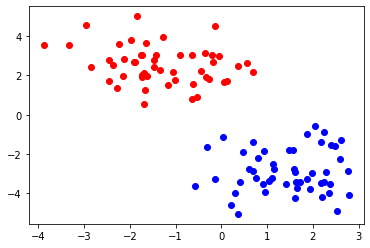

In [437]:
a = np.matmul(R, a)
plt.scatter(a[0], a[1], c='r')
b = np.matmul(R, b)
plt.scatter(b[0], b[1], c='b')
plt.show()

The datapoints are rotated at 30 degrees

[[0.80826465]
 [0.936766  ]]


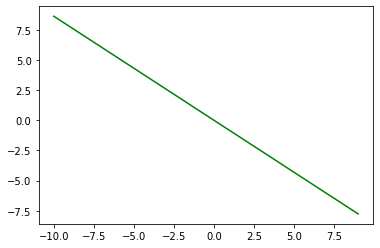

In [530]:
W = np.random.randn(2, 1)
print(W)
plt.plot(np.arange(-10, 10), -np.arange(-10, 10)*(W[0][0]/W[1][0]), c='g')

The weights are genereated randomly. <br>
Note: We don't use bias hence the line always passes through origin. But in the general implementation we have bias term

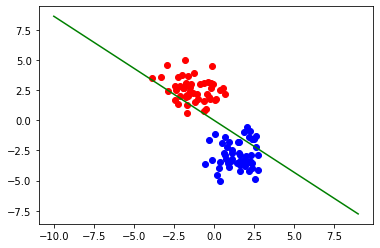

In [531]:
plt.plot(np.arange(-10, 10), -np.arange(-10, 10)*(W[0][0]/W[1][0]), c='g')
plt.scatter(a[0], a[1], c='r')
plt.scatter(b[0], b[1], c='b')

In [532]:
x = [[], []]
print(x[1])
for i in range(N):
  x[0].append(a[0][i])
  x[1].append(a[1][i])
for i in range(N):
  x[0].append(b[0][i])
  x[1].append(b[1][i])
x = np.array(x)
print(x.shape)
x = np.transpose(x)

[]
(2, 100)


In [533]:
lr = 0.01
for j in range(10):
  count = 0
  for i in range(100):
    n = np.random.randint(2*N)
    # print(n)
    
    # print(n, np.matmul(np.transpose(W), x[n]))
    if((n < N and np.matmul(np.transpose(W), x[n])[0] < 0)):
      # print(n)
      count += 1
      W = W + lr * np.transpose([x[n]] )
    if((n >= N and np.matmul(np.transpose(W), x[n])[0] > 0)):
      W = W - lr * np.transpose([x[n]])
      # print(n)
      count += 1
  print(count)

10
7
1
1
0
1
2
1
1
0


50
(100, 2)


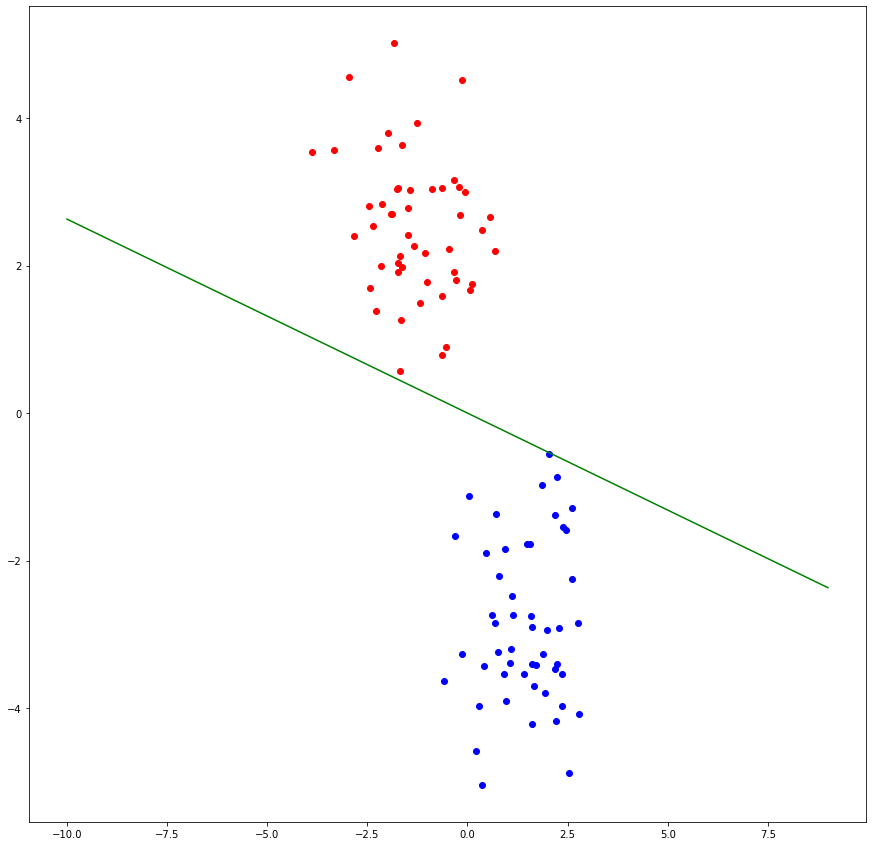

In [534]:
print(N)
print(x.shape)
# print(x)
# print(x[:N][0], x[:N][1])
fig = plt.figure(figsize = (15, 15))
plt.plot(np.arange(-10, 10), -np.arange(-10, 10)*(W[0][0]/W[1][0]), c='g')
plt.scatter(a[0], a[1], c='r')
plt.scatter(b[0], b[1], c='b')

In [514]:
print(W)

[[-1.56348494]
 [ 0.21473367]]


After many iterations, we obtain solution that divides both the classes

In [431]:
np.matmul(np.transpose(W), x[9])

array([0.00195408])

In [414]:
print(W)

[[-0.5514736 ]
 [ 0.90214731]]


In [274]:
np.arange(-10, 10)*W[1][0]

array([-13.44085129, -12.09676616, -10.75268103,  -9.4085959 ,
        -8.06451077,  -6.72042564,  -5.37634052,  -4.03225539,
        -2.68817026,  -1.34408513,   0.        ,   1.34408513,
         2.68817026,   4.03225539,   5.37634052,   6.72042564,
         8.06451077,   9.4085959 ,  10.75268103,  12.09676616])

In [275]:
-np.arange(-10, 10)*W[1][0]/W[0][0]

array([-8.39847346, -7.55862611, -6.71877877, -5.87893142, -5.03908408,
       -4.19923673, -3.35938938, -2.51954204, -1.67969469, -0.83984735,
       -0.        ,  0.83984735,  1.67969469,  2.51954204,  3.35938938,
        4.19923673,  5.03908408,  5.87893142,  6.71877877,  7.55862611])